Importing Libraries

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance


Plotting Image

(500, 333, 3)


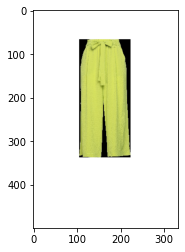

In [2]:
IMG_PATH = "bottoms_resized_png/"
img = cv2.imread(IMG_PATH+"13315564GCR.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
#plt.axis("off")
plt.show()

Exploring Directories

In [3]:
dir_list = os.listdir(IMG_PATH)
print(dir_list)
arr =np.array(dir_list)

['13079565VVD.png', '13079565VVR.png', '13108390UDD.png', '13108390UDR.png', '13110484CLD.png', '13110484CLR.png', '13162479UBD.png', '13162479UBR.png', '13180761CUD.png', '13180761CUR.png', '13192537MCD.png', '13192537MCR.png', '13224618QUD.png', '13224618QUR.png', '13260596HKD.png', '13260596HKR.png', '13315564GCD.png', '13315564GCR.png', '13322221VND.png', '13322221VNR.png', '13339508HCD.png', '13339508HCR.png', '13345903MID.png', '13345903MIR.png', '13348395JOD.png', '13348395JOR.png', '13352669CSD.png', '13352669CSR.png', '13354163IGD.png', '13354163IGR.png', '13354761IPD.png', '13354761IPR.png', '13364135SMD.png', '13364135SMR.png', '13391227BHD.png', '13391227BHR.png', '13391635KQD.png', '13391635KQR.png', '13400677WED.png', '13400677WER.png', '13408264WSD.png', '13408264WSR.png', '13425393LGD.png', '13425393LGR.png', '13428218QFD.png', '13428218QFR.png', '13442408RMD.png', '13442408RMR.png', '13452264CGD.png', '13452264CGR.png', '13459405FID.png', '13459405FIR.png', '13460096XM

In [4]:
print(arr)

['13079565VVD.png' '13079565VVR.png' '13108390UDD.png' ...
 '35469919KWD.png' '35469919KWR.png' '35469965SND.png']


Extracting Feature Vector of Images Using Pre-trained CNN architectures

In [5]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))

In [6]:
model_new = Model(model.input,model.layers[-2].output)

Encoding into feature vector through below two functions


In [7]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Normalisation
    img = preprocess_input(img)
    return img

In [8]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    feature_vector = feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector

In [9]:
encode_image("bottoms_resized_png/13315564GCR.png")

array([1.0445322, 0.6135966, 0.       , ..., 0.9857848, 1.6638943,
       0.7575111], dtype=float32)

In [10]:
from time import time
start = time()
encoding_train = {}
#image_id -->feature_vector extracted from Resnet Image
for i in arr:
    print(i)
    encoding_train[i] = encode_image(IMG_PATH+ i)
            
end_t = time()
print("Total Time Taken :",end_t-start)

13079565VVD.png
13079565VVR.png
13108390UDD.png
13108390UDR.png
13110484CLD.png
13110484CLR.png
13162479UBD.png
13162479UBR.png
13180761CUD.png
13180761CUR.png
13192537MCD.png
13192537MCR.png
13224618QUD.png
13224618QUR.png
13260596HKD.png
13260596HKR.png
13315564GCD.png
13315564GCR.png
13322221VND.png
13322221VNR.png
13339508HCD.png
13339508HCR.png
13345903MID.png
13345903MIR.png
13348395JOD.png
13348395JOR.png
13352669CSD.png
13352669CSR.png
13354163IGD.png
13354163IGR.png
13354761IPD.png
13354761IPR.png
13364135SMD.png
13364135SMR.png
13391227BHD.png
13391227BHR.png
13391635KQD.png
13391635KQR.png
13400677WED.png
13400677WER.png
13408264WSD.png
13408264WSR.png
13425393LGD.png
13425393LGR.png
13428218QFD.png
13428218QFR.png
13442408RMD.png
13442408RMR.png
13452264CGD.png
13452264CGR.png
13459405FID.png
13459405FIR.png
13460096XMD.png
13460096XMR.png
13461429GQD.png
13461429GQR.png
13461429PCD.png
13461429PCR.png
13462253WCD.png
13462253WCR.png
13462369OCD.png
13462369OCR.png
13464005

13586451RPD.png
13586451RPR.png
13586469ACD.png
13586469ACR.png
13586472KMD.png
13586472KMR.png
13586482DSD.png
13586482DSR.png
13586498PUD.png
13586498PUR.png
13586524VSD.png
13586572WAD.png
13586572WAR.png
13586573NJD.png
13586573NJR.png
13586575JQD.png
13586575JQR.png
13586582OWD.png
13586582OWR.png
13586620OWD.png
13586620OWR.png
13586716UCD.png
13586716UCR.png
13586720GFD.png
13586720GFR.png
13586724CVD.png
13586724CVR.png
13586726BED.png
13586726BER.png
13586732DFD.png
13586732DFR.png
13586740UUD.png
13586740UUR.png
13586745SPD.png
13586745SPR.png
13586771DGD.png
13586771DGR.png
13586786DFD.png
13586786DFR.png
13586788IQD.png
13586788IQR.png
13586855FSD.png
13586855FSR.png
13586889TGD.png
13586889TGR.png
13586898HLD.png
13586898HLR.png
13586913HDD.png
13586913HDR.png
13586939KAD.png
13586939KAR.png
13586941GBD.png
13586941GBR.png
13586964FRD.png
13586964FRR.png
13586978VXD.png
13586978VXR.png
13587021WVD.png
13587021WVR.png
13587023AED.png
13587023AER.png
13587037OQD.png
13587037

35469490LGR.png
35469522EBD.png
35469522EBR.png
35469559MOD.png
35469559MOR.png
35469682EJD.png
35469682EJR.png
35469743CED.png
35469743CER.png
35469772DFD.png
35469772DFR.png
35469776JGD.png
35469776JGR.png
35469801CGD.png
35469801CGR.png
35469803KND.png
35469803KNR.png
35469830CLD.png
35469830CLR.png
35469839NFD.png
35469839NFR.png
35469919KWD.png
35469919KWR.png
35469965SND.png
Total Time Taken : 281.00620126724243


In [11]:
print(encoding_train)


{'13079565VVD.png': array([0.2124131 , 2.8491886 , 0.08959688, ..., 0.033488  , 0.40816385,
       0.27602097], dtype=float32), '13079565VVR.png': array([0.34008288, 2.5673668 , 0.        , ..., 0.11808698, 0.07658262,
       1.7518684 ], dtype=float32), '13108390UDD.png': array([0.        , 2.6054885 , 0.        , ..., 0.        , 0.04101841,
       0.9292223 ], dtype=float32), '13108390UDR.png': array([0.23331946, 4.479315  , 0.07433162, ..., 0.        , 0.11902153,
       0.51727545], dtype=float32), '13110484CLD.png': array([0.        , 1.8937105 , 0.37732977, ..., 0.4840338 , 0.08194094,
       1.7034678 ], dtype=float32), '13110484CLR.png': array([0.0000000e+00, 3.1859488e+00, 2.6236879e-02, ..., 3.7446329e-01,
       1.9737335e-03, 1.4637651e+00], dtype=float32), '13162479UBD.png': array([0.33437413, 1.7011817 , 0.        , ..., 0.2642556 , 0.20111962,
       0.887771  ], dtype=float32), '13162479UBR.png': array([0.44412878, 1.2293056 , 0.        , ..., 0.07720849, 0.16434766,
 

In [12]:
!mkdir saved

A subdirectory or file saved already exists.


In [13]:
# Store everything to the disk 
import pickle
with open("saved/encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [14]:
pant1 = encode_image('bottoms_resized_png/35469154OGD.png')     


Finding the distance using cosine similarity

In [15]:
metric = 'cosine'

In [16]:
for i in encoding_train:
    dc = distance.cdist([pant1], [encoding_train[i]], metric)[0]
    print("the distance between input and the next is {}".format(dc))
     

the distance between input and the next is [0.42297103]
the distance between input and the next is [0.34560459]
the distance between input and the next is [0.43705122]
the distance between input and the next is [0.49135434]
the distance between input and the next is [0.39293258]
the distance between input and the next is [0.38149145]
the distance between input and the next is [0.42985663]
the distance between input and the next is [0.43798832]
the distance between input and the next is [0.31777495]
the distance between input and the next is [0.37151956]
the distance between input and the next is [0.379907]
the distance between input and the next is [0.31868221]
the distance between input and the next is [0.37542652]
the distance between input and the next is [0.3971973]
the distance between input and the next is [0.44942149]
the distance between input and the next is [0.3667441]
the distance between input and the next is [0.3910656]
the distance between input and the next is [0.3261626

the distance between input and the next is [0.43027079]
the distance between input and the next is [0.43067948]
the distance between input and the next is [0.38603041]
the distance between input and the next is [0.42245054]
the distance between input and the next is [0.36088055]
the distance between input and the next is [0.38857507]
the distance between input and the next is [0.39498541]
the distance between input and the next is [0.40963517]
the distance between input and the next is [0.40403637]
the distance between input and the next is [0.46431633]
the distance between input and the next is [0.45842633]
the distance between input and the next is [0.38498014]
the distance between input and the next is [0.41712655]
the distance between input and the next is [0.34538543]
the distance between input and the next is [0.29035068]
the distance between input and the next is [0.35902859]
the distance between input and the next is [0.37615727]
the distance between input and the next is [0.40

the distance between input and the next is [0.52214613]
the distance between input and the next is [0.42078611]
the distance between input and the next is [0.39173137]
the distance between input and the next is [0.31652895]
the distance between input and the next is [0.31795957]
the distance between input and the next is [0.4446196]
the distance between input and the next is [0.39944779]
the distance between input and the next is [0.46304518]
the distance between input and the next is [0.36301487]
the distance between input and the next is [0.38090545]
the distance between input and the next is [0.35429754]
the distance between input and the next is [0.38297337]
the distance between input and the next is [0.41022995]
the distance between input and the next is [0.33339029]
the distance between input and the next is [0.29384731]
the distance between input and the next is [0.3718145]
the distance between input and the next is [0.31834195]
the distance between input and the next is [0.4741

the distance between input and the next is [0.38758848]
the distance between input and the next is [0.33341893]
the distance between input and the next is [0.48488669]
the distance between input and the next is [0.45679919]
the distance between input and the next is [0.42809081]
the distance between input and the next is [0.40881995]
the distance between input and the next is [0.37587625]
the distance between input and the next is [0.40955384]
the distance between input and the next is [0.48980636]
the distance between input and the next is [0.42755195]
the distance between input and the next is [0.37315899]
the distance between input and the next is [0.38525423]
the distance between input and the next is [0.32938536]
the distance between input and the next is [0.28434569]
the distance between input and the next is [0.35782485]
the distance between input and the next is [0.41200938]
the distance between input and the next is [0.42620668]
the distance between input and the next is [0.48

the distance between input and the next is [0.3298069]
the distance between input and the next is [0.29138572]
the distance between input and the next is [0.29168738]
the distance between input and the next is [0.34432105]
the distance between input and the next is [0.38275075]
the distance between input and the next is [0.38097922]
the distance between input and the next is [0.40187327]
the distance between input and the next is [0.26063079]
the distance between input and the next is [0.21436304]
the distance between input and the next is [0.35844745]
the distance between input and the next is [0.31239961]
the distance between input and the next is [0.36086576]
the distance between input and the next is [0.29863264]
the distance between input and the next is [0.34432193]
the distance between input and the next is [0.36193691]
the distance between input and the next is [0.35688396]
the distance between input and the next is [0.35334608]
the distance between input and the next is [0.333

In [17]:
cosine_distance = []
for i in arr:
    dc = distance.cdist([pant1], [encoding_train[i]], metric)[0]
    cosine_distance.append([dc, i])
    


In [18]:
print(cosine_distance)     # list of list

[[array([0.42297103]), '13079565VVD.png'], [array([0.34560459]), '13079565VVR.png'], [array([0.43705122]), '13108390UDD.png'], [array([0.49135434]), '13108390UDR.png'], [array([0.39293258]), '13110484CLD.png'], [array([0.38149145]), '13110484CLR.png'], [array([0.42985663]), '13162479UBD.png'], [array([0.43798832]), '13162479UBR.png'], [array([0.31777495]), '13180761CUD.png'], [array([0.37151956]), '13180761CUR.png'], [array([0.379907]), '13192537MCD.png'], [array([0.31868221]), '13192537MCR.png'], [array([0.37542652]), '13224618QUD.png'], [array([0.3971973]), '13224618QUR.png'], [array([0.44942149]), '13260596HKD.png'], [array([0.3667441]), '13260596HKR.png'], [array([0.3910656]), '13315564GCD.png'], [array([0.3261626]), '13315564GCR.png'], [array([0.42158948]), '13322221VND.png'], [array([0.33126756]), '13322221VNR.png'], [array([0.31700545]), '13339508HCD.png'], [array([0.35292653]), '13339508HCR.png'], [array([0.34516132]), '13345903MID.png'], [array([0.36621144]), '13345903MIR.png'

Sorting distances to get the more similar images to the input image in ascending order

In [19]:
cosine_distance.sort()

In [20]:
print(cosine_distance)

[[array([2.22044605e-16]), '35469154OGD.png'], [array([0.08162695]), '35469154OGR.png'], [array([0.15276929]), '35468902SBD.png'], [array([0.15483988]), '35468616KXR.png'], [array([0.1629353]), '13589244AJR.png'], [array([0.18363811]), '35468902SBR.png'], [array([0.18976387]), '35468617DFD.png'], [array([0.19529728]), '35466660NLD.png'], [array([0.19605568]), '35468616KXD.png'], [array([0.19830089]), '35464472VTR.png'], [array([0.20530702]), '35468633JIR.png'], [array([0.2122901]), '35468893FWR.png'], [array([0.21292906]), '35362994LFR.png'], [array([0.21395288]), '35468112SUD.png'], [array([0.21436304]), '35468816CTR.png'], [array([0.21608959]), '35469113THR.png'], [array([0.2188417]), '35469318WHR.png'], [array([0.2209299]), '35362994LFD.png'], [array([0.23524752]), '35469108UIR.png'], [array([0.23591186]), '35469559MOD.png'], [array([0.23959986]), '35468617DFR.png'], [array([0.24104027]), '35469318WHD.png'], [array([0.24177353]), '35468672COR.png'], [array([0.24216354]), '35469291FO

In [21]:
result = []
for dist,idx in cosine_distance:
    result.append(idx)



In [22]:
print(result)

['35469154OGD.png', '35469154OGR.png', '35468902SBD.png', '35468616KXR.png', '13589244AJR.png', '35468902SBR.png', '35468617DFD.png', '35466660NLD.png', '35468616KXD.png', '35464472VTR.png', '35468633JIR.png', '35468893FWR.png', '35362994LFR.png', '35468112SUD.png', '35468816CTR.png', '35469113THR.png', '35469318WHR.png', '35362994LFD.png', '35469108UIR.png', '35469559MOD.png', '35468617DFR.png', '35469318WHD.png', '35468672COR.png', '35469291FOR.png', '35468236PDD.png', '35469113THD.png', '35467428DGD.png', '13588967OKD.png', '13587273HFR.png', '35468112SUR.png', '35466660NLR.png', '35468681QWR.png', '13588742WKR.png', '35469489PQD.png', '35469108UID.png', '13589244AJD.png', '35468912WUD.png', '35469245GBR.png', '13586482DSD.png', '35469490LGD.png', '13586482DSR.png', '35468672COD.png', '13584997ADD.png', '35468464IMR.png', '35468816CTD.png', '35468946XPR.png', '35469490LGR.png', '35468236PDR.png', '13587657KRR.png', '35469014FUD.png', '13635205WSR.png', '35467092SCR.png', '13428218QF

Displaying Result

35469154OGD.png
35469154OGR.png
35468902SBD.png
35468616KXR.png
13589244AJR.png
35468902SBR.png
35468617DFD.png
35466660NLD.png
35468616KXD.png
35464472VTR.png


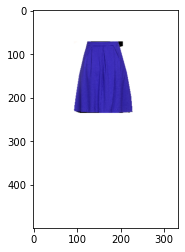

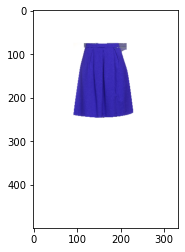

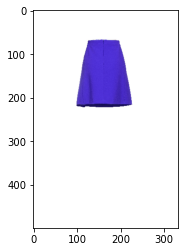

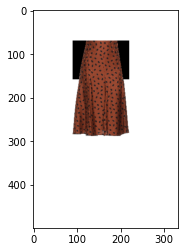

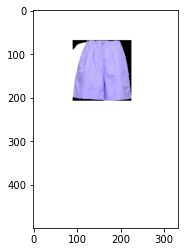

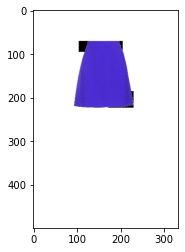

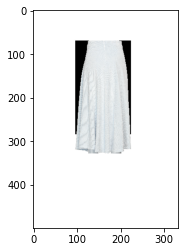

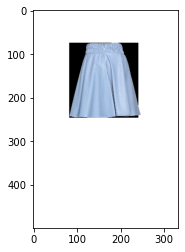

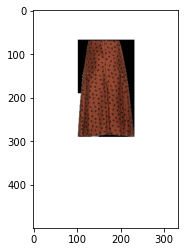

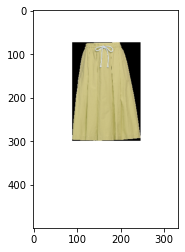

In [23]:
for idx in result:
    print(idx)
    img = cv2.imread(IMG_PATH + idx)
    plt.figure()
    plt.imshow(img)
    x += 1
    if(x > 9):
        break

Conclusion

1. Tried other similarity metrics as well such as Euclidean and Dot product.
2. Finally submission with Cosine Similarity
